In [1]:
import pickle
import math
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
with open('data/generation_sequences_women_data.pkl', 'rb') as f:
    generation_sequences_women_data = pickle.load(f)
    
with open('data/generation_sequences_women_label.pkl', 'rb') as f:
    generation_sequences_women_label = pickle.load(f)
    
with open('data/generation_sequences_men_data.pkl', 'rb') as f:
    generation_sequences_men_data = pickle.load(f)
    
with open('data/generation_sequences_men_label.pkl', 'rb') as f:
    generation_sequences_men_label = pickle.load(f)
    
with open('data/gender_sequences_data.pkl', 'rb') as f:
    genre_sequences_data = pickle.load(f)
    
with open('data/gender_sequences_label.pkl', 'rb') as f:
    genre_sequences_label = pickle.load(f)

In [4]:
from gsa.reader import ReadFromCSV
from gsa.metrics import accuracy_score_with_unclassified_objects, CostValueAbstainingClassifiers, tpr_fpr_nonclass
from gsa.classifier import ClassifierBySequencePatterns, ClassifierByClosureSequencePatterns,\
    ClassifierByHypothesisPatterns

### Classification by Gender
Строим классификатор для определния пола

In [5]:
data = genre_sequences_data
label = genre_sequences_label

In [6]:
size_of_train = int(len(data)*0.66)

X_train = data[:size_of_train]
X_test = data[size_of_train:]

y_train = label[:size_of_train]
y_test = label[size_of_train:]

In [7]:
sum(label)

3314

In [8]:
sum(label) / len(label)

0.5001509206157562

In [9]:
sum(y_train) / len(y_train)

0.49805625428767436

In [10]:
sum(y_test) / len(y_test)

0.5042166000887706

In [11]:
tpr_list = []
fpr_list = []
non_cl_rate_list = []
print('min_sup;min_growth_rate;accuracy;TPR;FPR;non_classified_rate')
for min_sup in [0.001, 0.004, 0.01, 0.025, 0.04, 0.05, 0.1]:
    for min_growth_rate in [1.5, 1.25, 2, 2.25, 3, 3.5, 5, 7]:
        classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                     threshold_for_rules=min_sup,
                                                     threshold_for_growth_rate=min_growth_rate)
        classifier.fit(X_train, y_train)
        test_pred = classifier.predict(X_test)
        acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
        tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
        if not math.isnan(acc) and not(tpr == fpr == 1.0):
            tpr_list.append(tpr)
            fpr_list.append(fpr)
            non_cl_rate_list.append(non_cl_num/len(y_test))
            print(f'{min_sup};{min_growth_rate};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_sup;min_growth_rate;accuracy;TPR;FPR;non_classified_rate
0.001;1.5;0.6270368135184068;0.6706875753920386;0.4166666666666667;0.26453617399023527
0.001;1.25;0.6034172661870504;0.647373107747106;0.44141689373297005;0.01287172658677319
0.001;2;0.6385767790262172;0.6113207547169811;0.3345724907063197;0.525965379494008
0.001;2.25;0.6342780026990553;0.561046511627907;0.3022670025188917;0.6711051930758988
0.001;3;0.6558139534883721;0.6287128712871287;0.3201754385964912;0.8091433644030182
0.001;3.5;0.6943521594684385;0.5725190839694656;0.21176470588235294;0.8664003550821128
0.001;5;0.7198067632850241;0.5542168674698795;0.1693548387096774;0.9081225033288948
0.001;7;0.7803030303030303;0.6666666666666666;0.14102564102564102;0.9414114513981359
0.004;1.5;0.6104844061048441;0.6578599735799208;0.43733333333333335;0.33111407012871724
0.004;1.25;0.5901639344262295;0.6663577386468953;0.4876893939393939;0.052374611628939194
0.004;2;0.6336154776299879;0.6109785202863962;0.3431372549019608;0.63293386595

/Users/dgizdatullin/.pyenv/versions/common3/lib/python3.6/site-packages/numpy/lib/function_base.py:356: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/dgizdatullin/.pyenv/versions/common3/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


0.025;1.5;0.6165228113440198;0.6872037914691943;0.4601542416452442;0.6400355082112739
0.025;1.25;0.5749588138385503;0.6764069264069265;0.5295429208472687;0.19174434087882822
0.025;2;0.6781002638522428;0.772093023255814;0.4451219512195122;0.831779849090102
0.04;1.5;0.6212389380530974;0.6037037037037037;0.36271186440677966;0.7492232578783844
0.04;1.25;0.5741822429906542;0.6802800466744457;0.5321637426900585;0.2401242787394585
0.04;2;0.6595744680851063;0.72;0.4090909090909091;0.8539724811362628
0.05;1.5;0.6081730769230769;0.5502645502645502;0.3436123348017621;0.8153573013759432
0.05;1.25;0.5622025832766825;0.7523302263648469;0.6361111111111111;0.3470927652019529
0.1;1.25;0.5481002425222312;0.8483483483483484;0.8021015761821366;0.4509542831779849


In [12]:
from matplotlib.patches import Ellipse

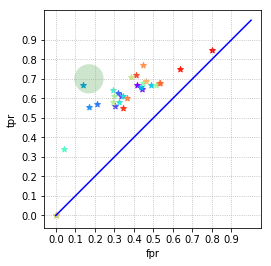

In [13]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
ax.set_aspect('equal', adjustable='box')

ell = Ellipse((0.17, 0.7), 0.15, 0.15, 0)
ell.set_alpha(0.2)
ell.set_facecolor('g')
ax.add_artist(ell)

colors = cm.rainbow(np.linspace(0, 1, len(tpr_list)))
plt.plot([0, 1], [0, 1], 'b-')
for i in range(len(tpr_list)):
    plt.scatter(fpr_list[i], tpr_list[i], color=colors[i], marker='*')
plt.grid(linestyle='dotted')
plt.xlabel('fpr')
plt.ylabel('tpr')
# plt.show()
plt.savefig('foo.png')

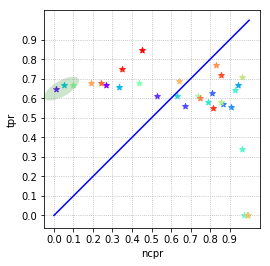

In [21]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
ax.set_aspect('equal', adjustable='box')

ell = Ellipse((0.04, 0.65), 0.2, 0.08, 30)
ell.set_alpha(0.2)
ell.set_facecolor('g')
ax.add_artist(ell)

colors = cm.rainbow(np.linspace(0, 1, len(tpr_list)))
plt.plot([0, 1], [0, 1], 'b-')
for i in range(len(tpr_list)):
    plt.scatter(non_cl_rate_list[i], tpr_list[i], color=colors[i], marker='*')
plt.grid(linestyle='dotted')
plt.xlabel('ncpr')
plt.ylabel('tpr')
plt.show()

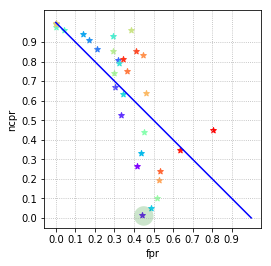

In [22]:
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 1, 0.1))
ax.set_yticks(np.arange(0, 1., 0.1))
ax.set_aspect('equal', adjustable='box')

ell = Ellipse((0.45, 0.01), 0.1, 0.1, 0)
ell.set_alpha(0.2)
ell.set_facecolor('g')
ax.add_artist(ell)

colors = cm.rainbow(np.linspace(0, 1, len(tpr_list)))
plt.plot([0, 1], [1, 0], 'b-')
for i in range(len(tpr_list)):
    plt.scatter(fpr_list[i], non_cl_rate_list[i], color=colors[i], marker='*')
plt.grid(linestyle='dotted')
plt.xlabel('fpr')
plt.ylabel('ncpr')
plt.show()

In [23]:
classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.001,
                                                 threshold_for_growth_rate=7)

In [24]:
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)
gender_0_patterns = classifier.important_rules(0)
gender_1_patterns = classifier.important_rules(1)

Выбрали паттерны с самым большим growth_rate, при этом удовлетворяющие минимальной поддержке 0.003

In [25]:
sorted((filter(lambda x: x[1][1] > 0.003, gender_0_patterns)), key=lambda x: -x[1][0])[0: 5]

[([['marriage'],
   ['separation'],
   ['children'],
   ['education'],
   ['work'],
   ['divorce']],
  [inf, 0.0036446469248291574]),
 ([['work'],
   ['separation'],
   ['partner'],
   ['marriage'],
   ['children'],
   ['education'],
   ['parting']],
  [inf, 0.0031890660592255125]),
 ([['separation'],
   ['education'],
   ['work'],
   ['marriage'],
   ['children'],
   ['divorce'],
   ['partner'],
   ['parting']],
  [inf, 0.0036446469248291574]),
 ([['marriage'], ['education'], ['separation']], [inf, 0.004100227790432802]),
 ([['separation'],
   ['education'],
   ['work'],
   ['partner'],
   ['parting'],
   ['children']],
  [inf, 0.0031890660592255125])]

In [27]:
sorted((filter(lambda x: x[1][1] > 0.002, gender_1_patterns)), key=lambda x: -x[1][0])[0: 5]

[([['education'], ['separation'], ['work'], ['marriage'], ['divorce']],
  [inf, 0.0032139577594123047]),
 ([['education'], ['separation'], ['work'], ['partner'], ['parting']],
  [inf, 0.0027548209366391185]),
 ([['separation'],
   ['education'],
   ['work'],
   ['partner'],
   ['marriage'],
   ['parting'],
   ['divorce']],
  [inf, 0.002295684113865932])]

### Women generations

In [28]:
data = generation_sequences_women_data
label = generation_sequences_women_label

In [29]:
sum(label)

1386

In [30]:
sum(label) / len(label)

0.41847826086956524

In [31]:
size_of_train = int(len(data)*0.66)

X_train = data[:size_of_train]
X_test = data[size_of_train:]

y_train = label[:size_of_train]
y_test = label[size_of_train:]

In [32]:
sum(y_train) / len(y_train)

0.422883295194508

In [33]:
sum(y_test) / len(y_test)

0.40993788819875776

Tunning minimal support for women

In [34]:
print('min_sup;accuracy;TPR;FPR;non_classified_rate')
for min_sup in [0.001, 0.004, 0.01, 0.025, 0.04, 0.05, 0.1]:
    classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                     threshold_for_rules=min_sup,
                                                     threshold_for_growth_rate=1.5)
    classifier.fit(X_train, y_train)
    test_pred = classifier.predict(X_test)
    acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
    tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
    if not math.isnan(acc) and not(tpr == fpr == 1.0):
        print(f'{min_sup};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_sup;accuracy;TPR;FPR;non_classified_rate
0.001;0.6166666666666667;0.4876712328767123;0.2953271028037383;0.20141969831410825
0.004;0.6282352941176471;0.5086206896551724;0.28884462151394424;0.24578527062999111
0.01;0.6333333333333333;0.503030303030303;0.27708333333333335;0.28127772848269744
0.025;0.6505681818181818;0.47058823529411764;0.22409638554216868;0.37533274179236914
0.04;0.6611295681063123;0.43037974683544306;0.18904109589041096;0.4658385093167702
0.05;0.6608996539792388;0.3891402714932127;0.17086834733893558;0.487133984028394
0.1;0.6956521739130435;0.0;0.0;0.6938775510204082


Tuning of minimal growth rate for women

In [35]:
print('min_growth_rate;accuracy;TPR;FPR;non_classified_rate')
for min_growth_rate in [1.5, 2, 2.25, 3, 5, 7]:
    classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.004,
                                                 threshold_for_growth_rate=min_growth_rate)
    classifier.fit(X_train, y_train)
    test_pred = classifier.predict(X_test)
    acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
    tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
    print(f'{min_growth_rate};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_growth_rate;accuracy;TPR;FPR;non_classified_rate
1.5;0.6282352941176471;0.5086206896551724;0.28884462151394424;0.24578527062999111
2;0.6793478260869565;0.5483870967741935;0.23582089552238805;0.5102040816326531
2.25;0.7071428571428572;0.6149068322981367;0.23552123552123552;0.6273291925465838
3;0.6910569105691057;0.6767676767676768;0.29931972789115646;0.7817213842058562
5;0.7029702970297029;0.8125;0.39622641509433965;0.9103815439219166
7;0.6888888888888889;0.85;0.44;0.9600709849157054


In [36]:
classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.004,
                                                 threshold_for_growth_rate=2.25)
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)
acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
print(acc, tpr, fpr, non_cl_num/len(y_test))

0.7071428571428572 0.6149068322981367 0.23552123552123552 0.6273291925465838


In [37]:
generation_0_patterns = classifier.important_rules(0)
generation_1_patterns = classifier.important_rules(1)

In [38]:
sorted((filter(lambda x: x[1][1] > 0.007, generation_0_patterns)), key=lambda x: -x[1][0])[0: 10]

[([['work'], ['separation'], ['education'], ['children']],
  [8.060269627279936, 0.008723235527359239]),
 ([['work'], ['education'], ['separation'], ['children']],
  [7.32751784298176, 0.007930214115781126]),
 ([['work'], ['education'], ['marriage'], ['children'], ['separation']],
  [5.862014274385407, 0.0190325138778747]),
 ([['work'], ['marriage'], ['separation'], ['education'], ['children']],
  [5.49563838223632, 0.011895321173671689]),
 ([['education'], ['work'], ['separation'], ['marriage']],
  [4.559344435633096, 0.04440919904837431]),
 ([['education'], ['work'], ['separation'], ['marriage'], ['children']],
  [4.396510705789056, 0.0380650277557494]),
 ([['work'], ['marriage'], ['separation'], ['education']],
  [4.152260111022998, 0.013481363996827915]),
 ([['work'], ['education'], ['marriage'], ['children']],
  [3.7858842188739095, 0.02458366375892149]),
 ([['education'], ['separation'], ['work'], ['marriage'], ['children']],
  [3.4195083267248214, 0.011102299762093577]),
 ([['wo

In [39]:
sorted((filter(lambda x: x[1][1] > 0.007, generation_1_patterns)), key=lambda x: -x[1][0])[0: 10]

[([['partner'], ['separation'], ['work']], [inf, 0.007575757575757576]),
 ([['marriage'], ['separation'], ['education'], ['children']],
  [17.741341991341994, 0.01406926406926407]),
 ([['marriage'], ['separation'], ['education'], ['children'], ['work']],
  [15.011904761904761, 0.011904761904761904]),
 ([['partner'], ['marriage'], ['children']],
  [13.647186147186147, 0.010822510822510822]),
 ([['partner'], ['education'], ['work']],
  [12.282467532467532, 0.00974025974025974]),
 ([['partner'], ['education']], [9.553030303030303, 0.015151515151515152]),
 ([['partner'], ['work']], [6.141233766233766, 0.00974025974025974]),
 ([['partner']], [5.198928056070913, 0.08658008658008658]),
 ([['partner'], ['marriage']], [5.003968253968254, 0.023809523809523808]),
 ([['work'], ['partner'], ['marriage'], ['separation']],
  [4.776515151515151, 0.007575757575757576])]

### Men generations

In [40]:
data = generation_sequences_men_data
label = generation_sequences_men_label

In [41]:
size_of_train = int(len(data)*0.66)

X_train = data[:size_of_train]
X_test = data[size_of_train:]

y_train = label[:size_of_train]
y_test = label[size_of_train:]

In [42]:
sum(label)

1711

In [43]:
sum(y_train) / len(y_train)

0.5208047553726566

In [44]:
sum(y_test) / len(y_test)

0.5075421472937001

Tunning minimal support for men

In [45]:
print('min_sup;accuracy;TPR;FPR;non_classified_rate')
for min_sup in [0.001, 0.004, 0.01, 0.025, 0.04, 0.05, 0.1]:
    classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                     threshold_for_rules=min_sup,
                                                     threshold_for_growth_rate=1.5)
    classifier.fit(X_train, y_train)
    test_pred = classifier.predict(X_test)
    acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
    tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
    if not math.isnan(acc) and not(tpr == fpr == 1.0):
        print(f'{min_sup};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_sup;accuracy;TPR;FPR;non_classified_rate
0.001;0.7032854209445585;0.587991718426501;0.18329938900203666;0.13575865128660158
0.004;0.6901709401709402;0.5783898305084746;0.1961206896551724;0.16947648624667258
0.01;0.6774193548387096;0.528604118993135;0.1716937354988399;0.22981366459627328
0.025;0.6744791666666666;0.48404255319148937;0.14285714285714285;0.318544809228039
0.04;0.6641366223908919;0.3416666666666667;0.06620209059233449;0.5323868677905945
0.05;0.6641366223908919;0.3416666666666667;0.06620209059233449;0.5323868677905945


Tuning of minimal growth rate for men

In [46]:
print('min_growth_rate;accuracy;TPR;FPR;non_classified_rate')
for min_growth_rate in [1.5, 2, 2.25, 3, 5, 7]:
    classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.001,
                                                 threshold_for_growth_rate=min_growth_rate)
    classifier.fit(X_train, y_train)
    test_pred = classifier.predict(X_test)
    acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
    tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
    print(f'{min_growth_rate};{acc};{tpr};{fpr};{non_cl_num/len(y_test)}')

min_growth_rate;accuracy;TPR;FPR;non_classified_rate
1.5;0.7032854209445585;0.587991718426501;0.18329938900203666;0.13575865128660158
2;0.7581967213114754;0.7317073170731707;0.21487603305785125;0.35048802129547474
2.25;0.7668810289389068;0.7378640776699029;0.20447284345047922;0.44809228039041704
3;0.8283752860411899;0.8214285714285714;0.1643192488262911;0.6122448979591837
5;0.8992537313432836;0.9006622516556292;0.10256410256410256;0.7622005323868678
7;0.9177489177489178;0.935251798561151;0.10869565217391304;0.7950310559006211


In [47]:
classifier = ClassifierByClosureSequencePatterns(number_of_classes=2,
                                                 threshold_for_rules=0.001,
                                                 threshold_for_growth_rate=2.25)
classifier.fit(X_train, y_train)
test_pred = classifier.predict(X_test)
acc, non_cl_num = accuracy_score_with_unclassified_objects(y_test, test_pred)
tpr, fpr, _ = tpr_fpr_nonclass(y_test, test_pred)
print(acc, tpr, fpr, non_cl_num/len(y_test))

0.7668810289389068 0.7378640776699029 0.20447284345047922 0.44809228039041704


In [48]:
generation_0_patterns = classifier.important_rules(0)
generation_1_patterns = classifier.important_rules(1)

In [49]:
sorted((filter(lambda x: x[1][1] > 0.02, generation_0_patterns)), key=lambda x: -x[1][0])[0: 10]

[([['work'], ['marriage'], ['children'], ['education'], ['separation']],
  [8.33237913486005, 0.02194656488549618]),
 ([['work'], ['marriage'], ['children'], ['education']],
  [5.434160305343512, 0.02385496183206107]),
 ([['work'], ['separation'], ['marriage'], ['children'], ['education']],
  [4.347328244274809, 0.03435114503816794]),
 ([['work'], ['marriage'], ['children']],
  [3.8039122137404577, 0.04007633587786259]),
 ([['work'], ['separation'], ['marriage']],
  [3.6680582061068705, 0.05152671755725191]),
 ([['separation'], ['work'], ['education'], ['marriage'], ['children']],
  [3.260496183206107, 0.03435114503816794]),
 ([['separation'], ['marriage'], ['education']],
  [3.2604961832061066, 0.020038167938931296]),
 ([['separation'], ['work'], ['education'], ['marriage']],
  [3.1828653217011995, 0.039122137404580155]),
 ([['work'], ['education'], ['marriage'], ['children'], ['separation']],
  [2.6851145038167936, 0.04007633587786259]),
 ([['work'], ['marriage']], [2.476966092668205

In [50]:
sorted((filter(lambda x: x[1][1] > 0.02, generation_1_patterns)), key=lambda x: -x[1][0])[0: 10]

[([['education'],
   ['work'],
   ['partner'],
   ['separation'],
   ['marriage'],
   ['children']],
  [inf, 0.021071115013169446]),
 ([['education'], ['work'], ['partner'], ['separation'], ['marriage']],
  [23.002633889376646, 0.021949078138718173]),
 ([['education'], ['work'], ['partner'], ['separation']],
  [4.945566286215979, 0.03775241439859526]),
 ([['education'], ['marriage']], [3.114202741946377, 0.038630377524143986]),
 ([['work'], ['education'], ['partner']],
  [2.972648071857905, 0.03687445127304653]),
 ([['partner']], [2.5479840615924902, 0.03160667251975417]),
 ([['education'], ['work'], ['separation'], ['partner']],
  [2.3309335674568334, 0.033362598770851626])]